In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
import sklearn.datasets as datasets 

In [21]:
iris= datasets.load_iris()
print(iris.feature_names)
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target']= iris.target
df

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
setosa_indices = df[df['target'] == 0].index
print(setosa_indices)
rows_to_drop = setosa_indices[:10] 
df.drop(rows_to_drop, inplace=True)
df

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype='int64')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
12,4.8,3.0,1.4,0.1,0
13,4.3,3.0,1.1,0.1,0
14,5.8,4.0,1.2,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
virginica_indices = df[df['target'] == 1].index
print(virginica_indices)
rows_to_drop = virginica_indices[:10] 
print(rows_to_drop)
df.drop(rows_to_drop, inplace=True)
df

Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64')
Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59], dtype='int64')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
12,4.8,3.0,1.4,0.1,0
13,4.3,3.0,1.1,0.1,0
14,5.8,4.0,1.2,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [24]:
versicolor_indices = df[df['target'] == 2].index
print(versicolor_indices)
rows_to_drop = versicolor_indices[:10] 
df.drop(rows_to_drop, inplace=True)
df

Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149],
      dtype='int64')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
12,4.8,3.0,1.4,0.1,0
13,4.3,3.0,1.1,0.1,0
14,5.8,4.0,1.2,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
df = df.drop('target',axis=1)
df



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
10,5.4,3.7,1.5,0.2
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1
13,4.3,3.0,1.1,0.1
14,5.8,4.0,1.2,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
y = df['petal length (cm)']
X = df.drop('petal length (cm)',axis = 1)
X

,sepal length (cm),sepal width (cm),petal width (cm)
10,5.4,3.7,0.2
11,4.8,3.4,0.2
12,4.8,3.0,0.1
13,4.3,3.0,0.1
14,5.8,4.0,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


In [27]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2) 
neighbors = np.arange(5,20)  
mse = np.empty(len(neighbors))
for i, k in enumerate(neighbors): 
    knn = KNeighborsRegressor(n_neighbors=k) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    mse[i] = mean_squared_error(y_test,y_pred)
print(mse)

[0.0716     0.07694444 0.08859694 0.0848112  0.08407407 0.0862625
 0.08016529 0.07796875 0.08019724 0.08296131 0.0829537  0.09040527
 0.09861159 0.10759516 0.11372461]


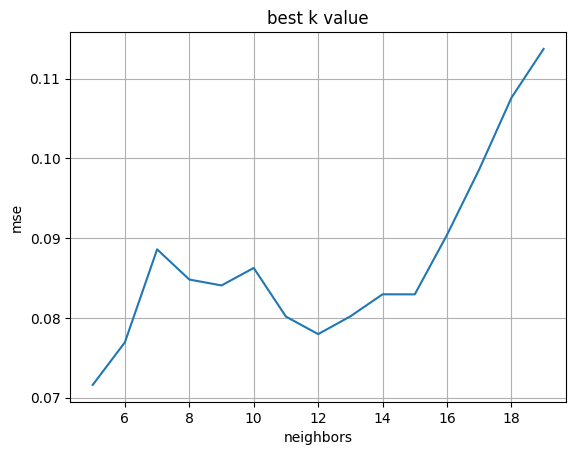

In [28]:
plt.plot(neighbors,mse)
plt.title('best k value')
plt.xlabel('neighbors')
plt.ylabel('mse')
plt.grid()
plt.show()